In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('/content/Amazon 2_Raw.xlsx')
df

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825
...,...,...,...,...,...,...,...,...,...,...
3198,CA-2013-125794,2013-09-30,2013-10-04,MarisLaWare@gmail.com,"United States,Los Angeles,California",Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,15.2208
3199,CA-2014-121258,2014-02-27,2014-03-04,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,15.6332
3200,CA-2014-121258,2014-02-27,2014-03-04,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Phones,Aastra 57i VoIP phone,258.576,2,19.3932
3201,CA-2014-121258,2014-02-27,2014-03-04,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,13.3200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      3203 non-null   object        
 1   Order Date    3203 non-null   datetime64[ns]
 2   Ship Date     3203 non-null   datetime64[ns]
 3   EmailID       3203 non-null   object        
 4   Geography     3203 non-null   object        
 5   Category      3203 non-null   object        
 6   Product Name  3203 non-null   object        
 7   Sales         3203 non-null   float64       
 8   Quantity      3203 non-null   int64         
 9   Profit        3203 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 250.4+ KB


In [4]:
df.isnull().sum()

Order ID        0
Order Date      0
Ship Date       0
EmailID         0
Geography       0
Category        0
Product Name    0
Sales           0
Quantity        0
Profit          0
dtype: int64

<Axes: title={'center': 'Sales Analysis over time'}, xlabel='Order Date'>

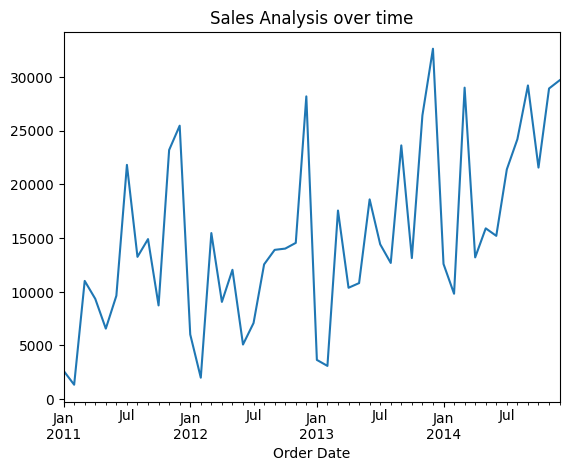

In [5]:
#Sales Analysis over time

df['Order Date']=pd.to_datetime(df['Order Date'])
month_samples=df.resample('M',on='Order Date')['Sales'].sum()
month_samples.plot(title='Sales Analysis over time')

<Axes: title={'center': 'Profit analysis over time'}, xlabel='Order Date'>

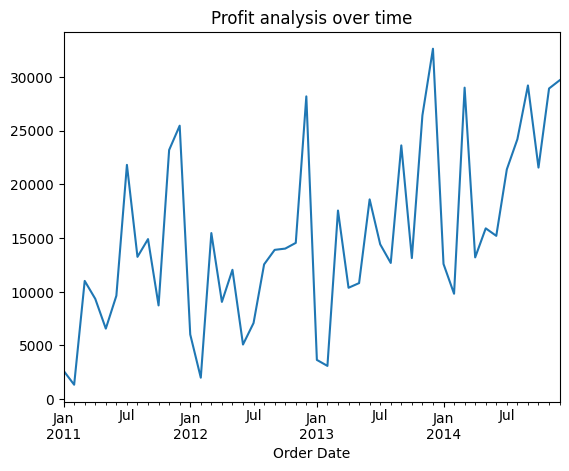

In [6]:
#Profit ananylis over time

month_samples_profit=df.resample('M',on='Order Date')['Profit'].sum()

month_samples.plot(title='Profit analysis over time')



<Axes: title={'center': 'Sales and Profit by Category'}, xlabel='Category'>

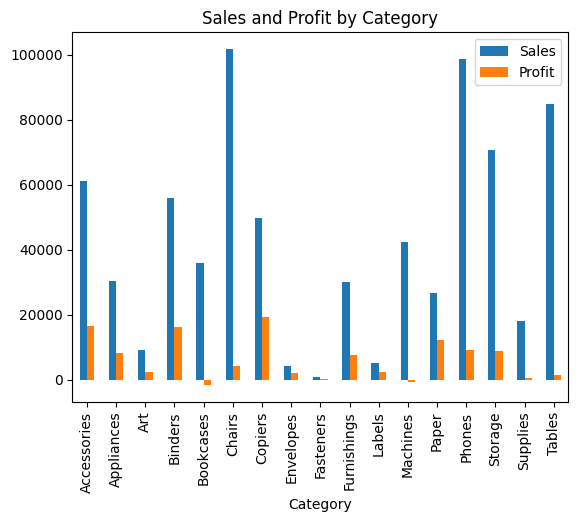

In [7]:
#Product category performance

category_performance=df.groupby('Category')[['Sales','Profit']].sum()
category_performance

category_performance.plot(kind='bar',title='Sales and Profit by Category')

In [8]:
#Geographic Analysis- Statewise

df[['Country','City','State']]=df['Geography'].str.split(',',expand=True)

state_data=df.groupby('State')[['Sales','Profit']].sum()
state_data

,Sales,Profit
State,,
Arizona,35282.0010,-3427.9246
California,457687.6315,76381.3871
Colorado,32108.1180,-6527.8579
Idaho,4382.4860,826.7231
Montana,5589.3520,1833.3285
Nevada,16729.1020,3316.7659
New Mexico,4783.5220,1157.1161
Oregon,17431.1500,-1190.4705
Utah,11220.0560,2546.5335


<Axes: title={'center': 'State wise Profit and Sales Analysis'}, xlabel='State'>

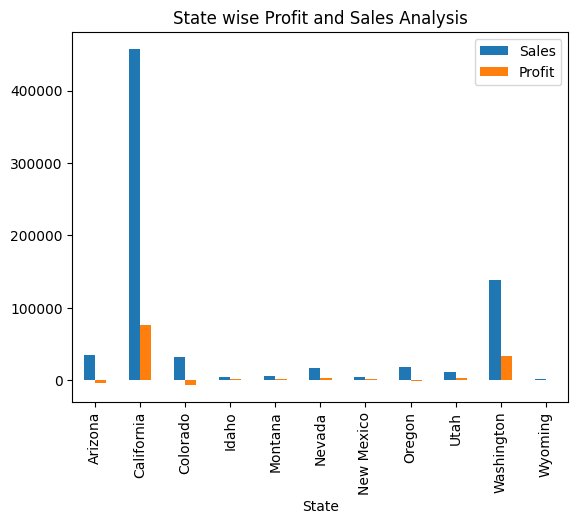

In [9]:
state_data.plot(kind='bar',title='State wise Profit and Sales Analysis')

In [10]:
#Geographic analysis- City Wise


city_data=df.groupby('City')[['Sales','Profit']].sum()
city_data

,Sales,Profit
City,,
Albuquerque,2220.160,634.0881
Anaheim,7986.870,1234.0036
Antioch,19.440,9.3312
Apple Valley,1915.081,283.6184
Arvada,503.400,59.8556
...,...,...
Westminster,3826.646,763.6886
Whittier,444.768,44.4768
Woodland,264.662,33.3848


<Axes: title={'center': 'City Wise Sales and Profit analysis'}, xlabel='City'>

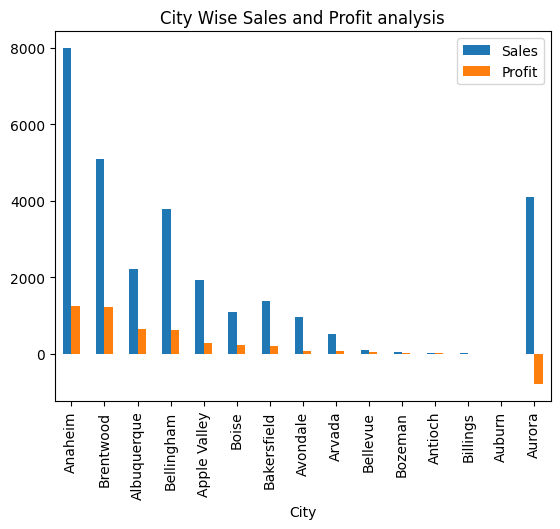

In [11]:
city_data.head(15).sort_values(by='Profit',ascending=False).plot(kind='bar',title='City Wise Sales and Profit analysis')

<Axes: title={'center': 'Average Time to Ship by Category'}, xlabel='Category'>

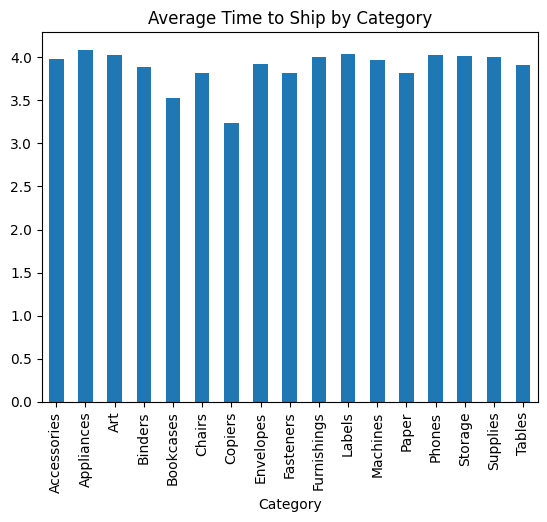

In [12]:
# Calculate Time to Ship
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Time to Ship'] = (df['Ship Date'] - df['Order Date']).dt.days
# Average time to ship by Category
average_time_to_ship = df.groupby('Category')['Time to Ship'].mean()
# Plotting
average_time_to_ship.plot(kind='bar', title='Average Time to Ship by Category')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: title={'center': 'Sales Forecast for Next 5 Years'}>

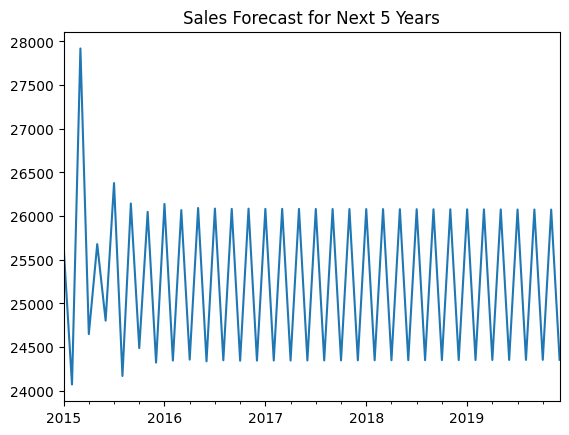

In [13]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd



model = ARIMA(month_samples, order=(5,1,2))
model_fit = model.fit()

# Forecast the next 12 months
forecast = model_fit.forecast(steps=60)

# Visualize the forecast
forecast.plot(title='Sales Forecast for Next 5 Years')


In [14]:
df

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit,Country,City,State,Time to Ship
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714,United States,Los Angeles,California,4
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694,United States,Los Angeles,California,5
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656,United States,Los Angeles,California,5
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152,United States,Los Angeles,California,5
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825,United States,Los Angeles,California,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,CA-2013-125794,2013-09-30,2013-10-04,MarisLaWare@gmail.com,"United States,Los Angeles,California",Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,15.2208,United States,Los Angeles,California,4
3199,CA-2014-121258,2014-02-27,2014-03-04,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,15.6332,United States,Costa Mesa,California,5
3200,CA-2014-121258,2014-02-27,2014-03-04,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Phones,Aastra 57i VoIP phone,258.576,2,19.3932,United States,Costa Mesa,California,5
3201,CA-2014-121258,2014-02-27,2014-03-04,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,13.3200,United States,Costa Mesa,California,5


####Customer Segmentation

In [15]:
#Recency Data

from datetime import datetime

df['Order Date']=pd.to_datetime(df['Order Date'])

current_date=df['Order Date'].max()+pd.Timedelta(days=5)

recency_date=df.groupby('EmailID').agg({'Order Date':lambda x:(current_date-x.max()).days}).rename(columns={'Order Date':'Recency'})

recency_date


,Recency
EmailID,
AaronBergman@gmail.com,1400
AaronHawkins@gmail.com,739
AaronSmayling@gmail.com,93
AdamBellavance@gmail.com,59
AdamHart@gmail.com,264
...,...
XylonaPreis@gmail.com,87
YanaSorensen@gmail.com,14
YosephCarroll@gmail.com,637


In [16]:
freq_data=df.groupby('EmailID').agg({'Order ID':lambda x:len(x)}).rename(columns={'Order ID':'Frequency'})
freq_data

,Frequency
EmailID,
AaronBergman@gmail.com,3
AaronHawkins@gmail.com,5
AaronSmayling@gmail.com,3
AdamBellavance@gmail.com,5
AdamHart@gmail.com,5
...,...
XylonaPreis@gmail.com,12
YanaSorensen@gmail.com,7
YosephCarroll@gmail.com,2


In [17]:
df['Total']=df['Quantity']*df['Sales']

monetary=df.groupby('EmailID')[['Total']].sum()
monetary=monetary.rename(columns={'Total':'Monetary'})

In [18]:
rfm=pd.concat([recency_date,freq_data,monetary],axis=1)
rfm

,Recency,Frequency,Monetary
EmailID,,,
AaronBergman@gmail.com,1400,3,831.352
AaronHawkins@gmail.com,739,5,8550.008
AaronSmayling@gmail.com,93,3,2085.714
AdamBellavance@gmail.com,59,5,15601.106
AdamHart@gmail.com,264,5,1570.590
...,...,...,...
XylonaPreis@gmail.com,87,12,2499.190
YanaSorensen@gmail.com,14,7,43347.996
YosephCarroll@gmail.com,637,2,3678.428


In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
rfm_scaled=scaler.fit_transform(rfm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

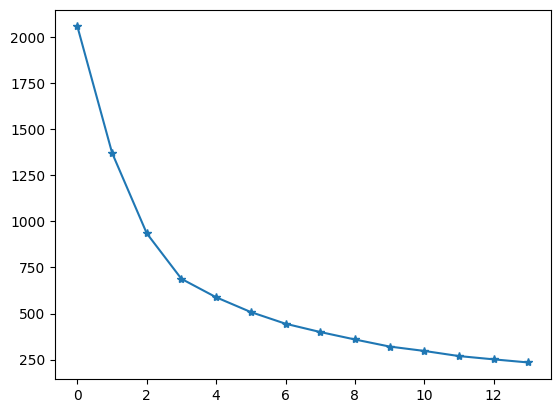

In [20]:
from sklearn.cluster import KMeans

inertia=[]
for i in np.arange(1,15):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(rfm_scaled)
  inertia.append(kmeans.inertia_)

plt.plot(inertia,marker='*')

In [21]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(rfm_scaled)

rfm['Labels']=(kmeans.labels_)
rfm

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Recency,Frequency,Monetary,Labels
EmailID,,,,
AaronBergman@gmail.com,1400,3,831.352,0
AaronHawkins@gmail.com,739,5,8550.008,0
AaronSmayling@gmail.com,93,3,2085.714,1
AdamBellavance@gmail.com,59,5,15601.106,2
AdamHart@gmail.com,264,5,1570.590,1
...,...,...,...,...
XylonaPreis@gmail.com,87,12,2499.190,2
YanaSorensen@gmail.com,14,7,43347.996,2
YosephCarroll@gmail.com,637,2,3678.428,0


In [22]:
rfm.groupby('Labels')[['Recency','Frequency','Monetary']].mean()

,Recency,Frequency,Monetary
Labels,,,
0,927.820988,2.191358,2202.813525
1,209.647668,4.059585,3047.800699
2,232.130435,9.282609,14928.306946


In [26]:
def func(row):
    if row['Labels'] == 1:
        return 'Average Customers'
    elif row['Labels'] == 2:
        return 'Whales'
    else:
        return 'Lapsed Customers'

# Apply the function to each row
rfm['Conditions'] = rfm.apply(func, axis=1)
rfm

,Recency,Frequency,Monetary,Labels,Conditions
EmailID,,,,,
AaronBergman@gmail.com,1400,3,831.352,0,Lapsed Customers
AaronHawkins@gmail.com,739,5,8550.008,0,Lapsed Customers
AaronSmayling@gmail.com,93,3,2085.714,1,Average Customers
AdamBellavance@gmail.com,59,5,15601.106,2,Whales
AdamHart@gmail.com,264,5,1570.590,1,Average Customers
...,...,...,...,...,...
XylonaPreis@gmail.com,87,12,2499.190,2,Whales
YanaSorensen@gmail.com,14,7,43347.996,2,Whales
YosephCarroll@gmail.com,637,2,3678.428,0,Lapsed Customers


<Axes: >

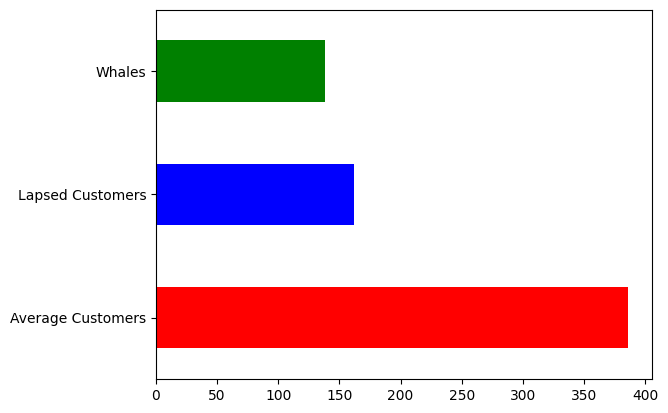

In [27]:
rfm['Conditions'].value_counts().plot(kind='barh',color=['red','Blue','Green'])